In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mramam167x0279","key":"725eb338a706250602b6297fdc689687"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

 99% 1.40G/1.41G [00:06<00:00, 200MB/s]
100% 1.41G/1.41G [00:06<00:00, 232MB/s]


In [ ]:
! mkdir fruit_dataset

In [ ]:
! unzip fresh-and-stale-images-of-fruits-and-vegetables.zip -d fruit_dataset

Streaming output truncated to the last 5000 lines.
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.09 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.15 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.24 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.32 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.02.38 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.21 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.27 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.33 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.06.40 PM.png  
  inflating: fruit_dataset/stale_banana/rotated_by_15_Screen Shot 2018-06-12

In [ ]:
import os
import tensorflow as tf
os.listdir('fruit_dataset/')

['stale_capsicum',
 'fresh_capsicum',
 'fresh_tomato',
 'fresh_bitter_gourd',
 'stale_apple',
 'fresh_apple',
 'stale_bitter_gourd',
 'fresh_orange',
 'stale_orange',
 'stale_banana',
 'stale_tomato',
 'fresh_banana',
 'ImageLabels.txt']

In [ ]:
base_dir ='fruit_dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
fresh_orange_dir = os.path.join(base_dir, 'fresh_orange')
fresh_tomato_dir = os.path.join(base_dir, 'fresh_tomato')
fresh_capsicum_dir = os.path.join(base_dir, 'fresh_capsicum')
fresh_banana_dir = os.path.join(base_dir, 'fresh_banana')
fresh_apple_dir = os.path.join(base_dir, 'fresh_apple')
fresh_bitter_gourd_dir = os.path.join(base_dir, 'fresh_bitter_gourd')
stale_orange_dir = os.path.join(base_dir, 'stale_orange')
stale_tomato_dir = os.path.join(base_dir, 'stale_tomato')
stale_capsicum_dir = os.path.join(base_dir, 'stale_capsicum')
stale_banana_dir = os.path.join(base_dir, 'stale_banana')
stale_apple_dir = os.path.join(base_dir, 'stale_apple')
stale_bitter_gourd_dir = os.path.join(base_dir, 'stale_bitter_gourd')


In [ ]:
import shutil

shutil.rmtree(fresh_capsicum_dir)
shutil.rmtree(stale_capsicum_dir )
shutil.rmtree(fresh_bitter_gourd_dir)
shutil.rmtree(stale_bitter_gourd_dir)
shutil.rmtree(fresh_tomato_dir)
shutil.rmtree(stale_tomato_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 8117 images belonging to 6 classes.
Found 2027 images belonging to 6 classes.


In [ ]:
os.listdir(base_dir)

['stale_apple',
 'fresh_apple',
 'fresh_orange',
 'stale_orange',
 'stale_banana',
 'fresh_banana',
 'ImageLabels.txt']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.applications import ResNet50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 512)       590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 512)      0

In [ ]:

model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.optimizers.Adam(), 
              metrics= ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
            print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
            self.model.stop_training = True 
 
callbacks = myCallback()

In [ ]:
history = model.fit(
          train_generator,
          epochs=30, 
          steps_per_epoch=len(train_generator),
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          verbose=2,
          callbacks = [callbacks])
     

Epoch 1/30
254/254 - 103s - loss: 1.1401 - accuracy: 0.5500 - val_loss: 0.7081 - val_accuracy: 0.7504 - 103s/epoch - 405ms/step
Epoch 2/30
254/254 - 85s - loss: 0.5361 - accuracy: 0.8100 - val_loss: 0.4104 - val_accuracy: 0.8466 - 85s/epoch - 335ms/step
Epoch 3/30
254/254 - 86s - loss: 0.4169 - accuracy: 0.8495 - val_loss: 0.3703 - val_accuracy: 0.8688 - 86s/epoch - 340ms/step
Epoch 4/30
254/254 - 85s - loss: 0.3867 - accuracy: 0.8557 - val_loss: 0.3105 - val_accuracy: 0.8865 - 85s/epoch - 336ms/step
Epoch 5/30
254/254 - 86s - loss: 0.3397 - accuracy: 0.8753 - val_loss: 0.2526 - val_accuracy: 0.9087 - 86s/epoch - 337ms/step
Epoch 6/30
254/254 - 84s - loss: 0.3205 - accuracy: 0.8810 - val_loss: 0.3318 - val_accuracy: 0.8786 - 84s/epoch - 331ms/step
Epoch 7/30
254/254 - 84s - loss: 0.2885 - accuracy: 0.8911 - val_loss: 0.2285 - val_accuracy: 0.9161 - 84s/epoch - 331ms/step
Epoch 8/30
254/254 - 85s - loss: 0.2669 - accuracy: 0.8980 - val_loss: 0.1736 - val_accuracy: 0.9393 - 85s/epoch - 3

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

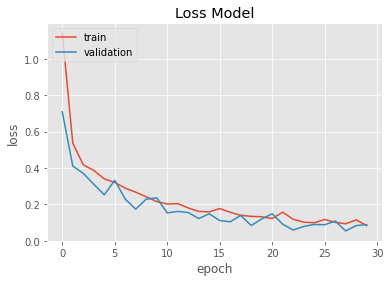

In [ ]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

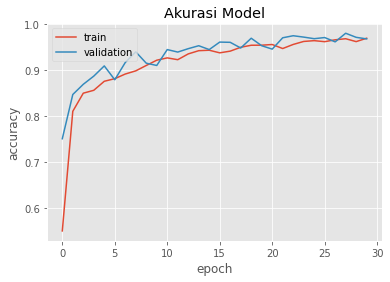

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss = model.evaluate(validation_generator, steps=len(validation_generator))

64/64 [==============================] - 18s 274ms/step - loss: 0.0982 - accuracy: 0.9660


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

In [ ]:
print(train_generator.class_indices)

{'fresh_apple': 0, 'fresh_banana': 1, 'fresh_orange': 2, 'stale_apple': 3, 'stale_banana': 4, 'stale_orange': 5}


Saving banana 2.jpg to banana 2.jpg
1/1 [==============================] - 0s 379ms/step
banana 2.jpg
fresh_banana


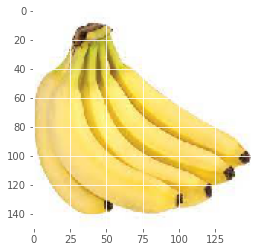

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=32) 
  output_class = np.argmax(classes) 
  print(fn)
  if classes[0,0]==1:
   print('fresh_apple')
  elif classes[0,1]==1:
    print('fresh_banana')
  elif classes[0,2]==1:
    print('fresh_orange')
  elif classes[0,3]==1:
    print('stale_apple')
  elif classes[0,4]==1:
    print('stale_banana')
  elif classes[0,5]==1:
    print('stale_orange')
  else:
   print('tidak di ketahui')

In [ ]:
model.save('fruit_model.h5')